# 🧠 AdaBoost (Adaptive Boosting) - Detailed Explanation

---

## 🔍 Introduction

**AdaBoost** (Adaptive Boosting) is an ensemble learning technique that combines multiple **weak learners** to create a **strong classifier**. It focuses on **misclassified data points** and gives them more importance in the next round, adapting over time.

- **Boosting** = Sequential learning
- **Weak Learner** = Classifier that performs slightly better than random (e.g., decision stump)
- Invented by Freund and Schapire (1995)

---

## 🚀 Intuition

Instead of building one complex model, we:
1. Build a simple model (stump)
2. See which samples it misclassified
3. Increase their importance (weight)
4. Train next model on this weighted data
5. Combine all models using weighted voting

Over time, the ensemble **focuses more on hard examples**.

---

## 🧮 AdaBoost Binary Classification: Algorithm

Given:
- Dataset: \( D = \{(x_1, y_1), (x_2, y_2), \dots, (x_N, y_N) \} \)
- Labels: \( y_i \in \{-1, +1\} \)
- Weak learners: \( h_1(x), h_2(x), \dots, h_T(x) \)
- Number of rounds: \( T \)

---

### 📌 Step-by-Step

#### Step 0: Initialize weights
$$
D_1(i) = \frac{1}{N} \quad \forall i = 1, ..., N
$$

#### For each round \( t = 1 \) to \( T \):
1. Train weak learner \( h_t(x) \) using weights \( D_t \)
2. Compute training error:
$$
\epsilon_t = \sum_{i=1}^{N} D_t(i) \cdot \mathbb{I}(h_t(x_i) \ne y_i)
$$
3. Compute learner weight:
$$
\alpha_t = \frac{1}{2} \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)
$$
4. Update sample weights:
$$
D_{t+1}(i) = \frac{D_t(i) \cdot e^{-\alpha_t y_i h_t(x_i)}}{Z_t}
$$
Where \( Z_t \) is a normalization constant so that \( \sum D_{t+1}(i) = 1 \)

---

### ✅ Final Model (Strong Classifier)

$$
H(x) = \text{sign} \left( \sum_{t=1}^{T} \alpha_t h_t(x) \right)
$$

Each weak learner contributes with weight \( \alpha_t \), so more accurate learners have more say.

---

## 📝 Manual Working (Example)

Let’s say:

| Sample | x | y  |
|--------|---|----|
| 1      | 0 | +1 |
| 2      | 1 | +1 |
| 3      | 2 | -1 |
| 4      | 3 | -1 |

### Round 1:
- Weak learner \( h_1(x) = \text{+1 if } x < 2.5 \text{ else -1} \)
- Misclassifies sample 3
- Error \( \epsilon_1 = 0.25 \)
- Weight \( \alpha_1 = 0.5 \cdot \ln(3) \approx 0.55 \)
- Update sample weights:
  - Misclassified samples get **more weight**
  - Correctly classified get **less weight**

### Round 2:
- Train on updated weights
- Pick best stump again (can be same or different)
- Repeat steps: error → alpha → update weights

---

## 📊 Key Characteristics

| Aspect            | Description |
|-------------------|-------------|
| Model type        | Ensemble of classifiers |
| Base learner      | Weak classifiers (e.g., decision stumps) |
| Training          | Sequential |
| Focus             | Misclassified samples |
| Final prediction  | Weighted majority vote |

---

## 👍 Advantages

- Works well with simple weak learners
- Reduces both bias and variance
- Robust to overfitting (for small T)
- Easy to implement

---

## ⚠️ Limitations

- Sensitive to noisy data and outliers
- Performance degrades if weak learner is too strong
- Overfitting possible if T is too large (especially on noisy data)

---

## 🔧 Use Cases

- Text classification
- Spam filtering
- Face detection
- Fraud detection

---

## 🧠 Summary

> AdaBoost turns "weak" models into a strong model by focusing on errors made in previous rounds and adjusting weights adaptively. The final model is a **weighted vote** of all weak learners.



# AdaBoost Manual Calculation – Step-by-Step on Small Dataset

## Dataset

We use a small dataset with 4 points:

| Sample | x | y  |
|--------|---|----|
| 1      | 0 | +1 |
| 2      | 1 | +1 |
| 3      | 2 | -1 |
| 4      | 3 | -1 |

We perform **T = 2** boosting rounds using decision stumps.

---

## Step 0: Initialize sample weights

$$
D_1 = \left[\frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4}\right]
$$

---

## Step 1: First Weak Learner \( h_1(x) = \text{+1 if } x < 2.5 \text{ else -1} \)

| Sample | x | y  | h₁(x) | Correct? |
|--------|---|----|-------|----------|
| 1      | 0 | +1 | +1    | ✅        |
| 2      | 1 | +1 | +1    | ✅        |
| 3      | 2 | -1 | +1    | ❌        |
| 4      | 3 | -1 | -1    | ✅        |

- Weighted error:
  $$
  \epsilon_1 = \frac{1}{4} = 0.25
  $$
- Learner weight:
  $$
  \alpha_1 = \frac{1}{2} \ln\left(\frac{1 - \epsilon_1}{\epsilon_1}\right) = \frac{1}{2} \ln(3) \approx 0.55
  $$

- Updated weights:

$$
\begin{align*}
\text{Correct (y h(x) = +1)} &: w = 0.25 \cdot e^{-0.55} \approx 0.145 \\
\text{Wrong (y h(x) = -1)} &: w = 0.25 \cdot e^{+0.55} \approx 0.433 \\
Z_1 &= 0.145 \cdot 3 + 0.433 = 0.868 \\
\Rightarrow D_2 &= \left[\frac{0.145}{0.868}, \frac{0.145}{0.868}, \frac{0.433}{0.868}, \frac{0.145}{0.868} \right] \\
&\approx [0.167, 0.167, 0.499, 0.167]
\end{align*}
$$

---

## Step 2: Second Weak Learner \( h_2(x) = \text{+1 if } x < 2.5 \text{ else -1} \)

Same as \( h_1 \), misclassifies only sample 3:

- Weighted error:  
  $$
  \epsilon_2 = 0.499 \quad \Rightarrow \quad \alpha_2 = \frac{1}{2} \ln\left(\frac{1 - \epsilon_2}{\epsilon_2}\right) \approx 0.002
  $$

---

## Final Model

$$
H(x) = \text{sign}(\alpha_1 h_1(x) + \alpha_2 h_2(x)) = \text{sign}(0.55 \cdot h_1(x) + 0.002 \cdot h_2(x))
$$

Effectively, dominated by \( h_1 \)

---

## Final Predictions

| x | y (True) | h₁(x) | h₂(x) | Final Score | Final Prediction |
|---|----------|--------|--------|--------------|------------------|
| 0 | +1       | +1     | +1     | 0.55 + 0.002 = 0.552 | +1 |
| 1 | +1       | +1     | +1     | 0.552 | +1 |
| 2 | -1       | +1     | +1     | 0.552 | +1 (❌) |
| 3 | -1       | -1     | -1     | -0.55 - 0.002 = -0.552 | -1 ✅ |

✅ **Accuracy: 3/4 = 75%**

---


---- AdaBoost Steps ----

Step 1
  Error: 0.2500
  Alpha: 0.5493
  Weights: [0.167 0.167 0.5   0.167]

Step 2
  Error: 0.5000
  Alpha: 0.0000
  Weights: [0.167 0.167 0.5   0.167]

Final Predictions:

x = 0, y = 1, score = 0.549, pred = 1, correct = True
x = 1, y = 1, score = 0.549, pred = 1, correct = True
x = 2, y = -1, score = 0.549, pred = 1, correct = False
x = 3, y = -1, score = -0.549, pred = -1, correct = True


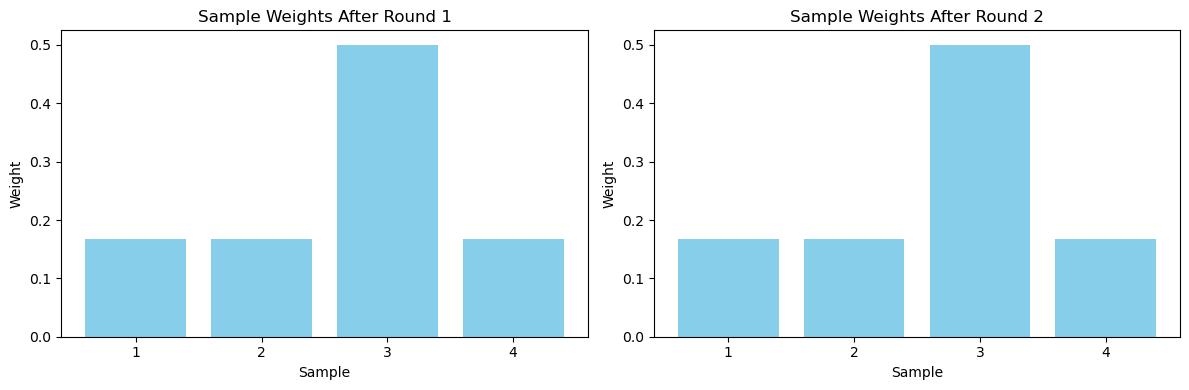

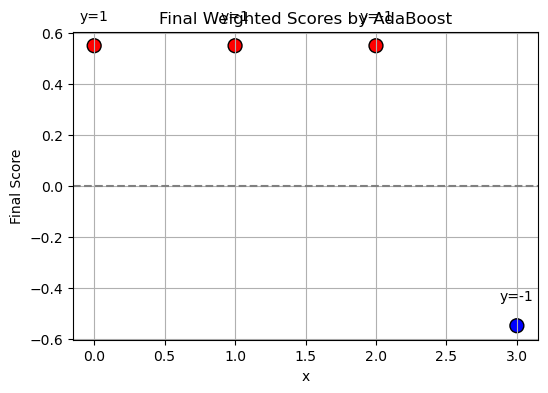

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 0: Dataset
X = np.array([0, 1, 2, 3])
y = np.array([+1, +1, -1, -1])
N = len(X)

# Step 1: Initialize sample weights
D = np.ones(N) / N  # D1 = [0.25, 0.25, 0.25, 0.25]
alphas = []
learners = []
weights_history = [D.copy()]

# Define two weak stumps manually
def h1(x):  # x < 2.5 => +1 else -1
    return np.where(x < 2.5, +1, -1)

def h2(x):  # same as h1 here to match manual example
    return np.where(x < 2.5, +1, -1)

Hs = [h1, h2]

print("---- AdaBoost Steps ----\n")
for t in range(2):
    h = Hs[t]
    pred = h(X)
    incorrect = (pred != y)
    err = np.sum(D[incorrect])
    err = max(err, 1e-10)
    alpha = 0.5 * np.log((1 - err) / err)

    # Store
    alphas.append(alpha)
    learners.append(h)

    # Update weights
    D = D * np.exp(-alpha * y * pred)
    D = D / np.sum(D)
    weights_history.append(D.copy())

    # Print info
    print(f"Step {t+1}")
    print(f"  Error: {err:.4f}")
    print(f"  Alpha: {alpha:.4f}")
    print(f"  Weights: {np.round(D, 3)}\n")

# Final model
def final_model(x):
    score = np.zeros_like(x, dtype=float)
    for alpha, h in zip(alphas, learners):
        score += alpha * h(x)
    return np.sign(score), score

final_pred, scores = final_model(X)

# Print final predictions
print("Final Predictions:\n")
for i in range(N):
    print(f"x = {X[i]}, y = {y[i]}, score = {scores[i]:.3f}, pred = {int(final_pred[i])}, correct = {final_pred[i] == y[i]}")
    
# --------------------------
# Plotting sample weights
# --------------------------
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
for t in range(2):
    axs[t].bar(range(1, N+1), weights_history[t+1], color='skyblue')
    axs[t].set_title(f"Sample Weights After Round {t+1}")
    axs[t].set_xlabel("Sample")
    axs[t].set_ylabel("Weight")
    axs[t].set_xticks([1, 2, 3, 4])
plt.tight_layout()
plt.show()

# --------------------------
# Plot final prediction scores
# --------------------------
plt.figure(figsize=(6, 4))
plt.scatter(X, scores, c=final_pred, cmap='bwr', s=100, edgecolor='k')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Final Weighted Scores by AdaBoost")
plt.xlabel("x")
plt.ylabel("Final Score")
for i in range(N):
    plt.text(X[i], scores[i]+0.1, f"y={y[i]}", ha='center')
plt.grid(True)
plt.show()
